In [1]:
import os

import pandas as pd
import numpy as np
import json
import cv2
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
data_directory = Path("/data/kaggle_data/")

In [3]:
os.listdir(data_directory)

['LIVECell_dataset_2021',
 'train_semi_supervised',
 'train',
 'train.csv',
 'sample_submission.csv',
 'test']

# train.csv

In [4]:
train_df = pd.read_csv(data_directory / "train.csv")
train_df.sample(4)  
# width and height are the same for all images
# 73585 objects in train

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
45666,9ae06a9d5011,239212 1 239914 5 240617 7 241321 8 242024 10 ...,704,520,shsy5y,11h30m00s,2019-06-14,shsy5y[diff]_D4-1_Vessel-714_Ph_2,0 days 11:30:00
44770,96304c6e06eb,334598 4 335300 10 336003 12 336707 12 337412 ...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_D9-2_Vessel-714_Ph_2,0 days 11:30:00
23869,551738f39e65,176528 8 177230 12 177932 15 178634 19 179336 ...,704,520,astro,09h00m00s,2020-09-12,astros[cereb]_E9-3_Vessel-361_Ph_1,0 days 09:00:00
14098,3625dabdf452,180298 6 181000 9 181703 11 182406 13 183110 1...,704,520,cort,13h30m00s,2020-10-29,cort[pre-treat]_A4-1_Vessel-377_Ph_1,0 days 13:30:00


<AxesSubplot:>

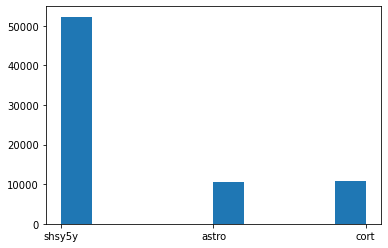

In [5]:
train_df['cell_type'].hist(grid=False)

In [6]:
train_df.annotation[43]

'191821 6 192525 8 193228 10 193932 10 194636 10 195340 11 196043 12 196747 12 197451 12 198154 14 198858 15 199562 15 200266 16 200969 18 201673 19 202377 19 203081 20 203784 21 204488 21 205193 20 205897 20 206602 19 207306 19 208011 18 208717 16 209424 13 210130 11 210837 8 211542 7 212248 5 212955 2'

# LIVECell_dataset_2021/

In [7]:
os.listdir(data_directory / 'LIVECell_dataset_2021')

['annotations', 'images']

In [8]:
cell_types = os.listdir(data_directory / 'LIVECell_dataset_2021' / 'images' / 'livecell_train_val_images') 
print("Cell types:", ", ".join(cell_types))

Cell types: BV2, SKOV3, RatC6, MCF7, SHSY5Y, Huh7, BT474, A172, SkBr3


### images

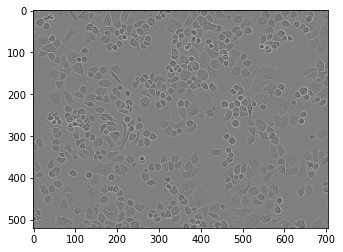

In [9]:
type_ = 'SkBr3'
type_path = data_directory / 'LIVECell_dataset_2021' / 'images' / 'livecell_train_val_images' / type_
image_path = type_path / os.listdir(type_path)[0]
image = cv2.imread(str(image_path))
plt.imshow(image)

### annotations

In [10]:
with open(data_directory / 'LIVECell_dataset_2021' / 'annotations' / 'LIVECell' / 'livecell_coco_train.json') as file:
    livecell_coco_train = json.load(file)

In [11]:
with open(data_directory / 'LIVECell_dataset_2021' / 'annotations' / 'LIVECell_single_cells' / 'skbr3' / 'livecell_skbr3_train.json') as file:
    livecell_skbr3_train = json.load(file)

In [12]:
livecell_coco_train['annotations']['2']
# the following looks quite the same
# livecell_skbr3_train['annotations']['1157048']

{'id': 2,
 'image_id': 1,
 'category_id': 1,
 'segmentation': [[288.02,
   305.63,
   286.01,
   298.87,
   286.01,
   295.4,
   288.02,
   290.1,
   293.86,
   287.91,
   297.51,
   287.73,
   300.44,
   289.01,
   304.27,
   292.48,
   304.64,
   295.04,
   305.18,
   297.77,
   305.18,
   300.7,
   303.91,
   302.52,
   301.17,
   305.26,
   297.33,
   307.45,
   294.59,
   307.45,
   290.58,
   308.0]],
 'area': 307.4786000000313,
 'bbox': [286.01, 287.73, 19.170000000000016, 20.269999999999982],
 'iscrowd': 0}

# train_semi_supervised/

In [13]:
print(len(os.listdir(data_directory / 'train_semi_supervised')))
os.listdir(data_directory / 'train_semi_supervised')[:3]

1972


['cort[pre-treat]_B8-4_Vessel-377_2020-10-29_13h30m00s_Ph_2.png',
 'cort[density]_C11-1_Vessel-376_2020-11-03_13h30m00s_Ph_4.png',
 'shsy5y[diff]_D12-1_Vessel-714_2019-06-16_11h30m00s_Ph_1.png']

In [14]:
semis_supervised_image = cv2.imread(str(data_directory / 'train_semi_supervised' / 'cort[pre-treat]_B8-4_Vessel-377_2020-10-29_13h30m00s_Ph_2.png'))

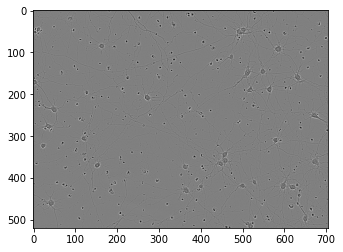

In [17]:
plt.imshow(semis_supervised_image)

In [18]:
print(len(os.listdir(data_directory / 'train')))

606


# train/

In [19]:
train_image = cv2.imread(str(data_directory / 'train' / '1c16d5cb1f30.png'))

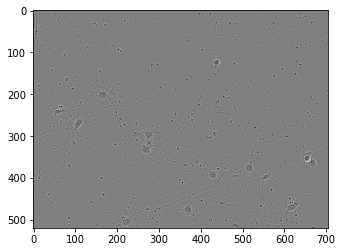

In [20]:
plt.imshow(train_image)